## Importing Packages

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras as k

In [93]:
df= pd.read_csv('C:/Users/VIVEK/Desktop/music/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [94]:
df.shape

(9990, 60)

In [95]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [96]:
df=df.drop(labels="filename",axis=1)

In [97]:
audio_recordings = "C:/Users/VIVEK/Desktop/music/Data/genres_original/country/country.00000.wav"
data , sr = librosa.load(audio_recordings)
print(type(data),type(str))

<class 'numpy.ndarray'> <class 'type'>


In [98]:
import librosa
import numpy as np

# load audio signal
audio_file = 'C:/Users/VIVEK/Desktop/music/Data/genres_original/country/country.00000.wav'
y, sr = librosa.load(audio_file, sr=22050)

# apply pre-emphasis filter to enhance high frequency components
y = librosa.effects.preemphasis(y)

# compute mel-spectrogram
n_fft = 2048
hop_length = 512
n_mels = 128
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

# convert power spectrogram to decibel scale
S_db = librosa.power_to_db(S, ref=np.max)

# normalize spectrogram values between -1 and 1
S_norm = librosa.util.normalize(S_db)

In [99]:
librosa.load(audio_recordings, sr=45600)

(array([-0.12953216, -0.19013676, -0.20116353, ...,  0.05469317,
         0.02240733,  0.        ], dtype=float32),
 45600)

In [100]:
import IPython
IPython.display.Audio(data,rate=sr)

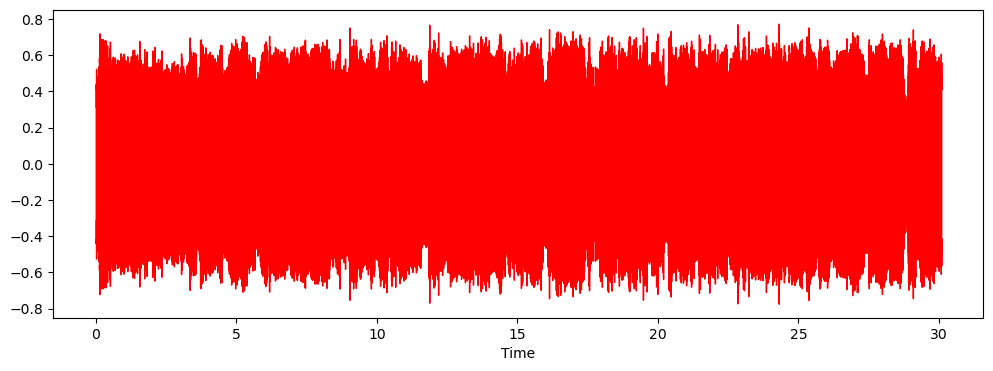

In [101]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color = "#FF0000")
plt.show()

C:\Users\VIVEK\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


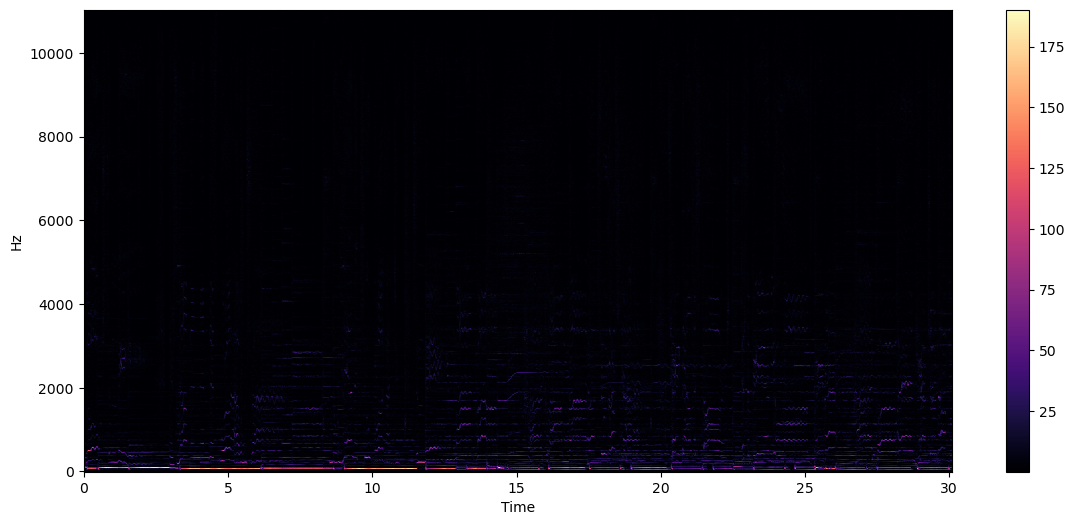

In [102]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft, sr=sr , x_axis='time', y_axis='hz')
plt.colorbar()

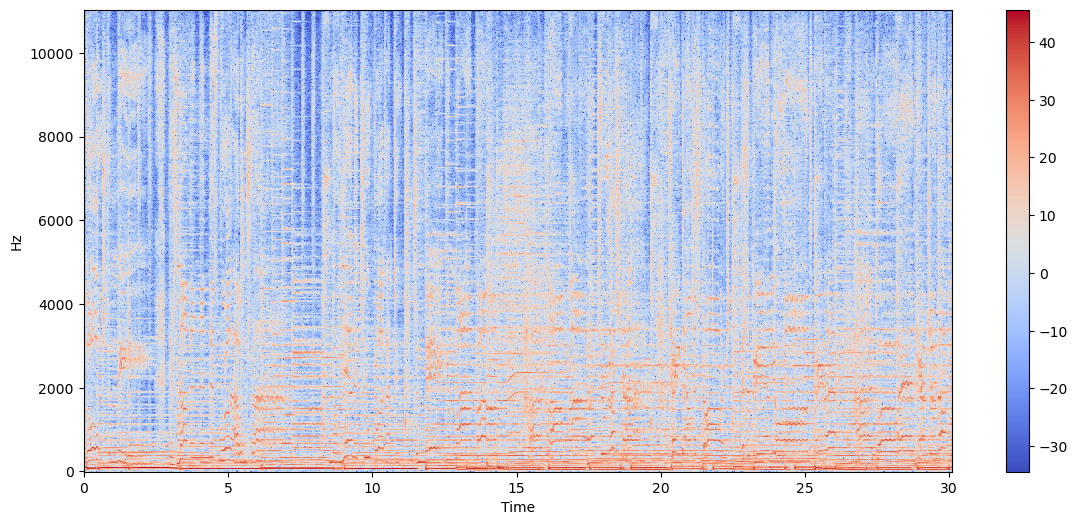

In [103]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr , x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_36548\1047078777.py:2: FutureWarning: Pass y=[-0.12415528 -0.18485473 -0.03257202 ...  0.2360437   0.16042115
  0.05238891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


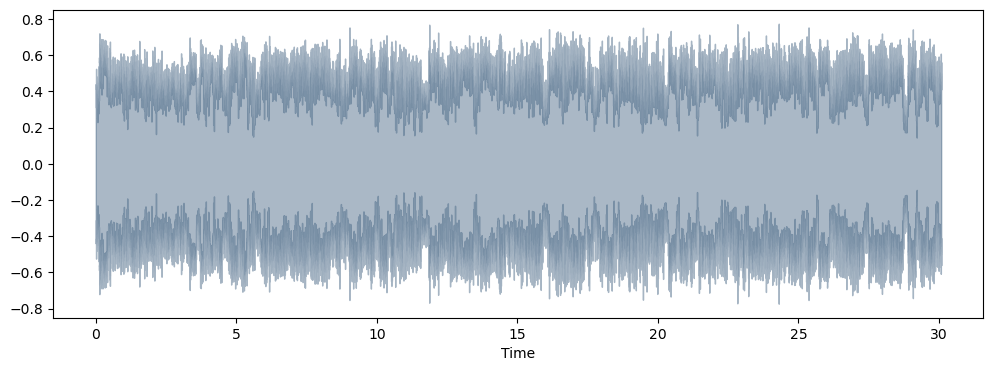

In [104]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data , sr=sr, alpha=0.4, color = "#2B4F72")

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_36548\306836887.py:2: FutureWarning: Pass y=[-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data , sr=sr)


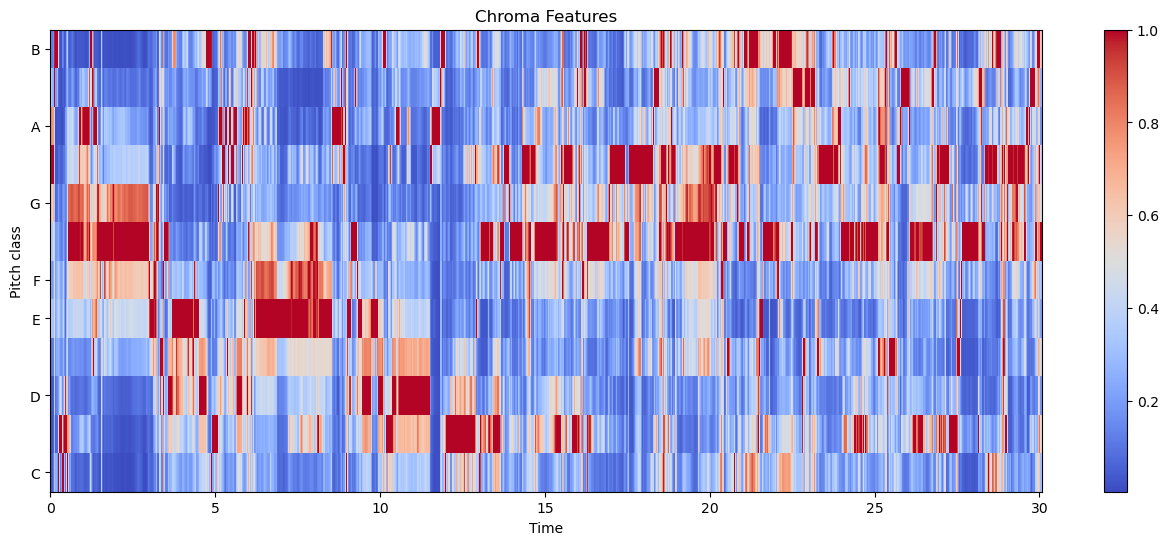

In [106]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data , sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis ='time',y_axis='chroma',cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

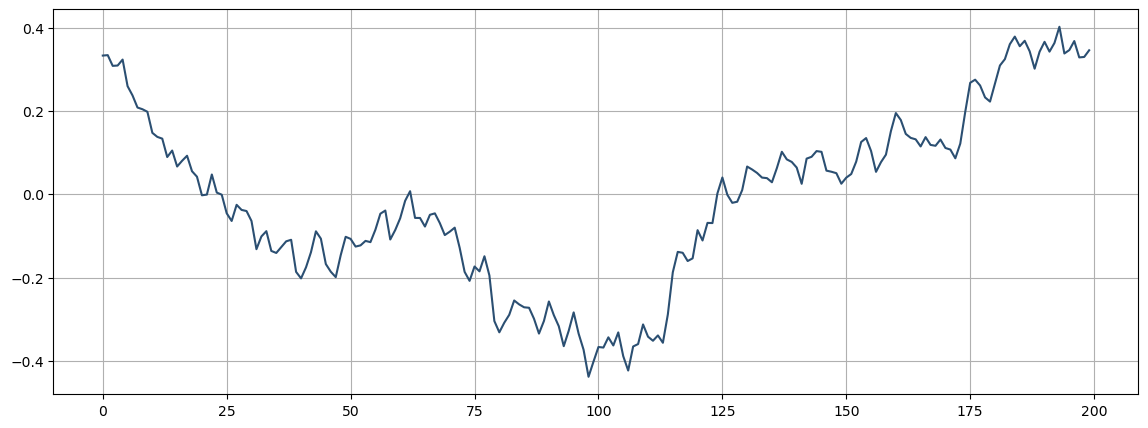

In [107]:
start=1000
end=1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end],color = "#2B4F72")
plt.grid()

In [108]:
zero_cross_rate = librosa.zero_crossings(data[start:end],pad=False)
print('the number of zero-crossings is:',sum(zero_cross_rate))

the number of zero-crossings is: 8


In [109]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [110]:
y = convertor.fit_transform(class_list)

In [111]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [112]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [113]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [115]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [116]:
len(y_train)

6693

In [117]:
len(y_test)

3297

In [118]:
from keras.models import Sequential

In [119]:
def trainModel(model, epochs , optimizer):
    batch_size = 128
    tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',
                 metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,callbacks=[tb_callback])
model.save('my_model.h5')

In [120]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    pli.show()

In [121]:
model = k.models.Sequential([
    k.layers.Dense(512, activation = 'relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history = trainModel(model = model , epochs=100, optimizer='adam')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 512)               30208     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)               

53/53 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.3498 - val_accuracy: 0.9142
Epoch 48/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.3300 - val_accuracy: 0.9157
Epoch 49/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0674 - accuracy: 0.9782 - val_loss: 0.3286 - val_accuracy: 0.9169
Epoch 50/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.3255 - val_accuracy: 0.9187
Epoch 51/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.3625 - val_accuracy: 0.9105
Epoch 52/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9816 - val_loss: 0.3987 - val_accuracy: 0.9042
Epoch 53/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9803 - val_loss: 0.3521 - val_accuracy: 0.9114
Epoch 54/100
53/53 

In [123]:
test_loss, test_acc = model.evaluate(X_test,y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe Best test Accuracy is:", test_acc*100)

26/26 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.9169
The test loss is : 0.4043779671192169

The Best test Accuracy is: 91.68941378593445


In [ ]:
!tensorboard --logdir .